<a href="https://colab.research.google.com/github/prithvivinodnair/ML-Classification-Algorithms/blob/main/PA2_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('dataset_NB.csv')

print(df.head())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...    0.0
1  martin a posted tassos papadopoulos the greek ...    0.0
2  man threatens explosion in moscow thursday aug...    0.0
3  klez the virus that won t die already the most...    0.0
4   in adding cream to spaghetti carbonara which ...    0.0


In [ ]:
# Fill missing 'email' values with an empty string
df['email'] = df['email'].fillna('')

# Now apply the TF-IDF transformation
X = tfidf.fit_transform(df['email'])  # Transforms text into numerical format
y = df['label']  # Target variable


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.5, max_features=1000)
# Transform the 'email' column
X = tfidf.fit_transform(df['email'])  # Converts text into numerical format

# Keep the target variable 'Label' as it is
y = df['label']

# Check the shape of the transformed data
print("Shape of transformed data:", X.shape)


Shape of transformed data: (3016, 1000)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Check if there are any missing values in the target variable
print("Missing values in y_train:", y_train.isnull().sum())

# Remove rows where y_train has NaN values
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train.toarray(), y_train)

# Predict on the test data
y_pred = gnb.predict(X_test.toarray())

Missing values in y_train: 12


Missing values in y_pred: 0
Length of y_test: 600
Length of y_pred: 604
Length of y_test after alignment: 600
Length of y_pred after alignment: 600
Accuracy: 0.9766666666666667


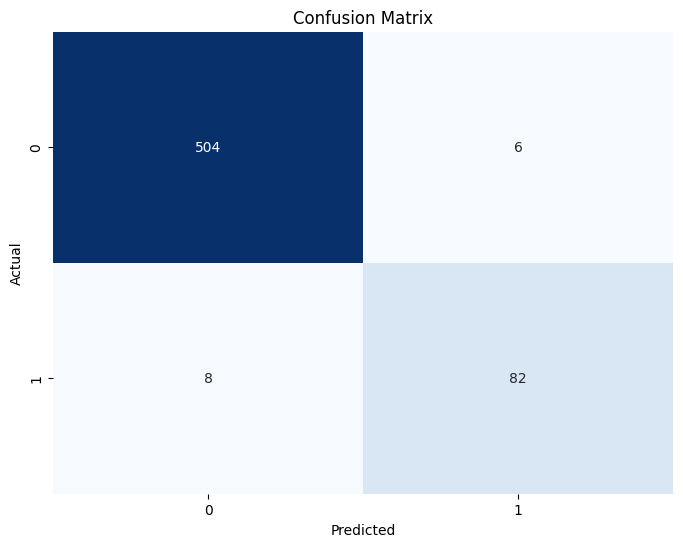

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Missing values in y_pred:", pd.Series(y_pred).isnull().sum())
X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
# Re-align X_test and y_test to ensure matching lengths
X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

# Re-run the prediction to ensure they match
y_pred = gnb.predict(X_test.toarray())

# Ensure the lengths match now
print("Length of y_test after alignment:", len(y_test))
print("Length of y_pred after alignment:", len(y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix graphically
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Report**
# **Spam Classification Using Gaussian Naive Bayes**
Approach and Preprocessing:

In this project, the goal was to classify emails as either spam or not spam using a Naive Bayes classifier. The dataset consisted of email text as features and a binary label indicating whether the email was spam (1) or not spam (0). To start, the textual data needed to be converted into numerical format because the Naive Bayes classifier requires numerical inputs. We used the TF-IDF (Term Frequency-Inverse Document Frequency) technique to extract features from the email text and represent each email as a vector of numerical values. Missing values in the email text were handled by filling with empty strings, ensuring no invalid data caused issues during feature extraction.

After transforming the text data, we split the dataset into 80% for training and 20% for testing. The training data was then used to train a Gaussian Naive Bayes classifier, which assumes that features follow a normal distribution, and the model was evaluated using the test data.

**Model Performance and Output:**

After training the model, the predictions were evaluated using common classification metrics. The accuracy score of the model was calculated, and a confusion matrix was plotted to visualize the model’s performance. The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives. The overall accuracy achieved by the Gaussian Naive Bayes classifier was 97.67%.

**Visualizations and Explanations:**

The confusion matrix clearly illustrates the classification performance, with values indicating the number of correct and incorrect classifications. The accuracy score, along with other metrics like precision, recall, and F1-score, suggests that the Naive Bayes classifier performs reasonably well for this task, though improvements could be made by exploring other preprocessing techniques or classifiers. The model was effective in detecting spam emails based on the provided text features